In [1]:
import tstrippy 
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [2]:
Mt,Rc,NP=1,1,int(1e4)
r = np.logspace(-2,1,1000)
Menc=tstrippy.ergodic.PlummerMassProfile(Mt, Rc,r)
Y = np.random.rand(NP)
r_samp = tstrippy.ergodic.PlummerRadius(Y,Rc)# does the inverse transform sampling
# find the intersection of the cumulative mass profile and the uniform distribution
M_enc_samp = tstrippy.ergodic.PlummerMassProfile(Mt, Rc,r_samp)
# make a nice histogram
nbins= int(np.ceil(np.sqrt(NP)))
# bins = np.logspace(-2,1,nbins)
bins = np.linspace(r_samp.min(),10,nbins)
m_hist = np.histogram(r_samp,bins=bins)[0]

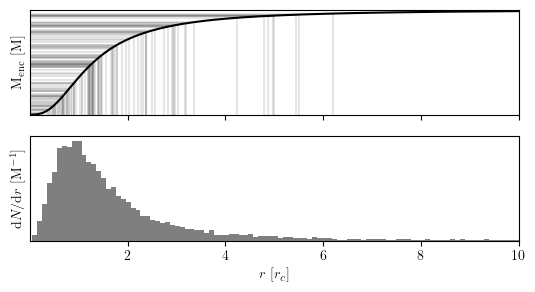

In [3]:
fig,axis=plt.subplots(2,1,figsize=(6.3,3),sharex=True)
axis[0].plot(r,Menc,label='Menc(r)',color='k');
axis[0].set_xlim(r.min(),r.max())
axis[0].set_ylim(0,1)
axis[0].set_ylabel(r"$\mathrm{M}_\mathrm{enc}~[\mathrm{M}]$")
axis[1].set_xlabel(r"$r~[r_c]$")
nskip = 100
axis[0].hlines(M_enc_samp[::nskip],np.zeros_like(r_samp)[::nskip],r_samp[::nskip],color='k',linestyle='-',alpha=.1)
axis[0].vlines(r_samp[::nskip],np.zeros_like(r_samp)[::nskip],M_enc_samp[::nskip],color='k',linestyle='-',alpha=.1)
axis[1].hist(r_samp,bins=bins,density=True,label='Sampled',color='k',alpha=.5);
axis[1].set_ylabel(r"$\mathrm{d}N/\mathrm{d}r~[\mathrm{M}^{-1}]$")
axis[1].set_yticks([])
axis[0].set_yticks([])
fig.savefig("../../images/inverse_transform_sampling_distances.png",bbox_inches='tight',dpi=300)

In [4]:
# now show the sampling of the velocities 
vx,vy,vz,speed,CDFAll,testVels,rannums=tstrippy.ergodic.velocitySampling(tstrippy.ergodic.DFPlummer, Mt, Rc, r_samp, G=1, storeCDF=True)

In [5]:
cmap = mpl.colormaps.get_cmap('rainbow')
norm = mpl.colors.Normalize(vmin=0, vmax=5)
colors = [cmap(norm(r)) for r in r_samp]
meancolor = np.mean(colors,axis=0)

In [6]:
bins = np.linspace(0,np.sqrt(2),nbins)

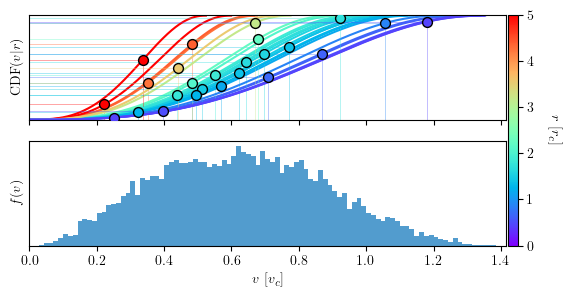

In [16]:
fig = plt.figure(figsize=(6.3,3))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1/50], height_ratios=[1, 1],wspace=0.01)
axis = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[1, 0])]
cax = fig.add_subplot(gs[:, 1])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='vertical')
cbar.set_label(r"$r~[r_c]$", rotation=270, labelpad=20)

for i in range(25):
    randint = np.random.randint(0,len(r_samp))
    axis[0].plot(testVels[randint],CDFAll[randint],color=colors[randint])
    axis[0].hlines(rannums[randint],0,speed[randint],color=colors[randint],linestyle='-',alpha=.5,linewidth=0.5)
    axis[0].scatter(speed[randint],rannums[randint],color=colors[randint],marker='o',s=50,edgecolor='k',linewidth=1,zorder=100)
    axis[0].vlines(speed[randint],0,rannums[randint],color=colors[randint],linestyle='-',alpha=.5,linewidth=0.5)
axis[1].hist(speed,bins=bins,density=True,label='Sampled',color=meancolor,alpha=1);
axis[0].set_xlim(0,np.sqrt(2))
axis[1].set_xlim(0,np.sqrt(2))
axis[0].set_ylim(0,1.01)
axis[1].set_xlabel(r"$v~[v_c]$")
axis[0].set_ylabel(r"$\mathrm{CDF}(v|r)$")
axis[0].set_xticklabels([]);
axis[0].set_yticks([]);
axis[1].set_ylabel(r"$ f (v)$")
axis[1].set_yticks([]);
fig.savefig("../../images/inverse_transform_sampling_velocities.png",dpi=300)